# **Biwi Kinect Head Pose**

<img src="http://www.evanmarie.com/content/files/notebook_images/biwi_kinect_head_pose.png" width=700>

(Image is from [POSEidon: Face-from-Depth for Driver Pose Estimation](https://arxiv.org/pdf/1611.10195v3.pdf))

#### Note: This project is my means of interpreting and digesting the information I took in from [*Deep Learning for Coders with Fast.ai and PyTorch*](https://github.com/fastai/fastbook/blob/master/06_multicat.ipynb). Please see chapter 6 of the book for a full description of this process. It was a bit more involved than other projects. And the book explains it brilliantly.

<br>
SOURCES:<br>

-  [Dataset information](https://www.kaggle.com/datasets/kmader/biwi-kinect-head-pose-database)

-  [Fast.ai Fastbook on GitHub](https://github.com/fastai/fastbook/blob/master/06_multicat.ipynb)

## Importing and getting data:

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.BIWI_HEAD_POSE)
Path.BASE_PATH = path

In [3]:
image_files = get_image_files(path)

## Function to attach each image to its corresponding file:

In [4]:
def connect_image_to_description(image_file):
    return Path(f'{str(image_file)[:-7]}pose.txt')

In [5]:
connect_image_to_description(image_files[0])

Path('11/frame_00426_pose.txt')

## Example from images:

(480, 640)


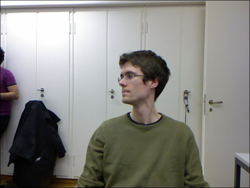

In [6]:
example = PILImage.create(image_files[0])
print(example.shape)
example.to_thumb(250)

## Function to grab the target, i.e. the labeled center of each image's head:

In [7]:
coordinate_info = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)

def center_coordinates(coordinate_file):
    center = np.genfromtxt(connect_image_to_description(coordinate_file), skip_header=3)
    coordinate_01 = center[0] * coordinate_info[0][0]/center[2] + coordinate_info[0][2]
    coordinate_02 = center[1] * coordinate_info[1][1]/center[2] + coordinate_info[1][2]
    return tensor([coordinate_01, coordinate_02])

In [8]:
coordinate_info

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

## The resulting coordinates in the image:

In [9]:
face_center = center_coordinates(image_files[0])
print(f"The coordinates for the center of image_files[0] is ({face_center[0]: .2f}, {face_center[1]: .2f} ).")

The coordinates for the center of image_files[0] is ( 342.23,  207.46 ).


## Dataloaders and batch examples:

In [10]:
faces = DataBlock(
    blocks = (ImageBlock, PointBlock),
    get_items = get_image_files,
    get_y = center_coordinates,
    splitter = FuncSplitter(lambda img: img.parent.name=='13'),
    batch_tfms = aug_transforms(size=(240,320)),)

In [11]:
loaders = faces.dataloaders(path)

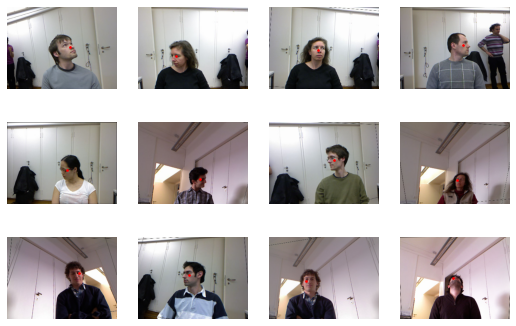

In [12]:
loaders.show_batch(max_n = 12, figsize=(9,6))

## Defining the model (Resnet-34) and finding a proper learning rate:

In [22]:
%%capture
model = vision_learner(loaders, resnet34, y_range = (-1, 1))

SuggestedLRs(valley=0.0008317637839354575)

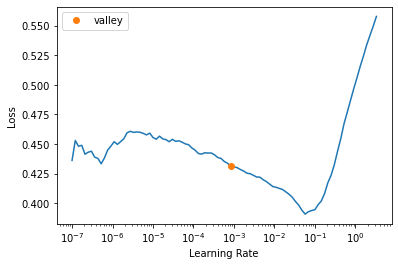

In [23]:
model.lr_find()

## Model training:

In [24]:
model.fine_tune(5, 0.0044)

epoch,train_loss,valid_loss,time
0,0.060905,0.014774,02:08


epoch,train_loss,valid_loss,time
0,0.004515,0.000722,02:19
1,0.003463,0.000362,02:17
2,0.002480,0.000438,02:25
3,0.001602,0.000121,02:17
4,0.001194,0.000064,02:17


## Targets vs. Predicted Targets:

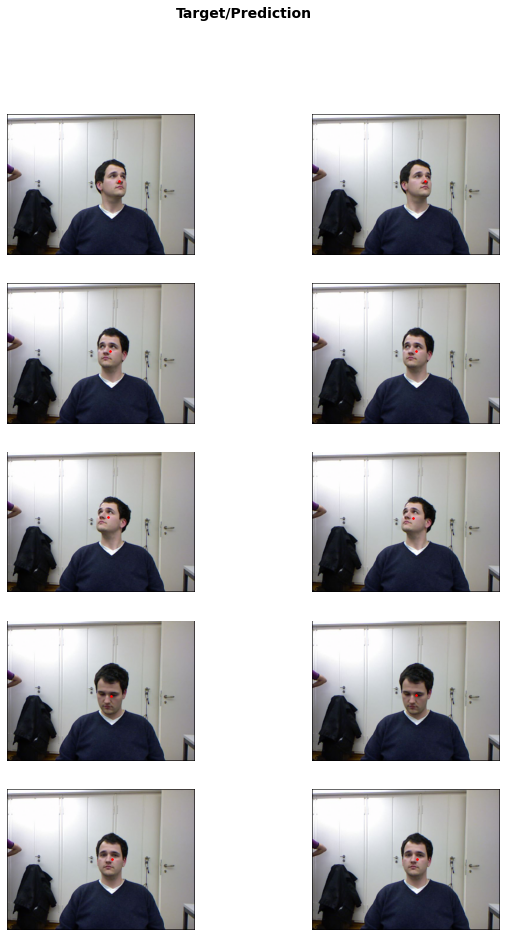

In [33]:
model.show_results(ds_idx=1, nrows=5, figsize=(10,15))

## Defining the model (Resnet-101) and finding an appropriate learning rate:

In [34]:
%%capture
model_02 = vision_learner(loaders, resnet101, y_range = (-1, 1))

SuggestedLRs(valley=0.005248074419796467)

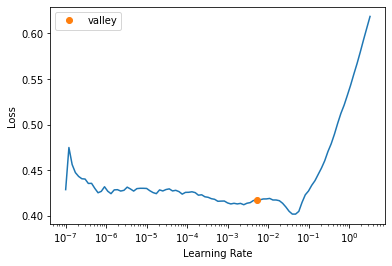

In [35]:
model_02.lr_find()

## Training Resnet-101:

In [37]:
model_02.fine_tune(5, 0.0044)

epoch,train_loss,valid_loss,time
0,0.062303,0.030320,04:41


epoch,train_loss,valid_loss,time
0,0.004237,0.000287,06:26
1,0.003535,0.001182,06:28
2,0.002394,0.000137,06:25
3,0.001515,0.000111,06:25
4,0.001166,0.000090,06:25


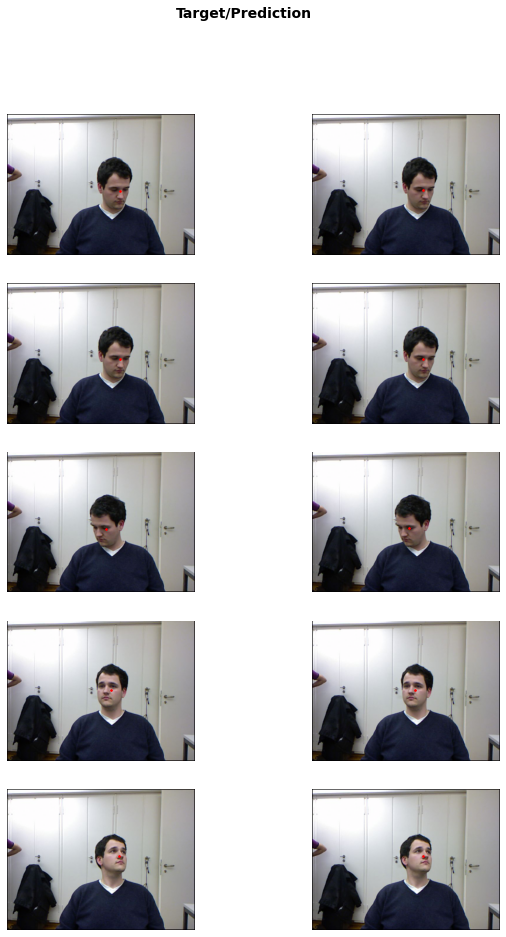

In [38]:
model_02.show_results(ds_idx=1, nrows=5, figsize=(10,15))